# Brandelyn EDA on Florida



In [10]:
data = "gs://pstat135-group22/notebooks/jupyter/data/VM2Uniform--FL--2021-05-19/"
from pyspark.sql.functions import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!gsutil ls {data + "VM2Uniform--FL--2021-05-19.tab"}

gs://pstat135-group22/notebooks/jupyter/data/VM2Uniform--FL--2021-05-19/VM2Uniform--FL--2021-05-19.tab


## Load df, Florida file only

In [3]:
df_fl = spark.read\
    .format("csv")\
    .option("header", "true")\
    .option("nullValue", "NA")\
    .option("delimiter", "\t")\
    .option("inferSchema", "true")\
    .load("gs://pstat135-group22/notebooks/jupyter/data/VM2Uniform--FL--2021-05-19/VM2Uniform--FL--2021-05-19.tab")

In [4]:
#df_fl.printSchema()

## Missing Data



In [6]:
#df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

## Sample
Lets consider small samples of some interesting variables to make it easier to explore. Consider the two most recent Presidential Elections for now.

In [27]:
# First lets pull out columns of interest
interest_cols = [ "General_2020", "General_2016","General_2018", "PresidentialPrimary_2020","PresidentialPrimary_2016",
                 "Voters_Age", "Voters_Gender", "County", "CountyEthnic_Description", "Voters_Active",
                   "Voters_VotingPerformanceEvenYearGeneral", 
                   "ElectionReturns_G18CountyTurnoutRepublicans",
                   "ElectionReturns_G18CountyTurnoutIndependentsAllOthers", 
                   "ElectionReturns_G18CountyTurnoutDemocrats",
                   "ElectionReturns_P18CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G16CountyTurnoutRepublicans",
                   "ElectionReturns_G16CountyTurnoutIndependentsAllOthers", 
                   "ElectionReturns_G16CountyTurnoutDemocrats",
                   "ElectionReturns_P16CountyTurnoutAllRegisteredVoters",
                   "Residence_Addresses_Property_LandSq_Footage",
                   "Residence_Addresses_Property_HomeSq_Footage",
                   "Parties_Description", 
                   "VoterParties_Change_Changed_Party",
                   "CommercialData_EstimatedHHIncome",
                   "CommercialData_AreaMedianEducationYears",
                   "CommercialDataLL_Household_Primary_Language",
                 "CommercialDataLL_Business_Owner"                              
]

In [28]:
# sample of the data
df_fl_pd = df_fl.select(*interest_cols).sample(True, 0.005, 123).toPandas()

In [29]:
df_fl_pd = df_fl_pd.sample(2000, random_state=123)

df_fl_pd.head()

df_fl_pd["State"] = "FL"


## Some Possible Considerations
How does property (household, land) ownership affect voter turnouts or patterns?
How does education level relate to voter alignment or patterns?
How would age and gender relate to voter alignment or patterns?

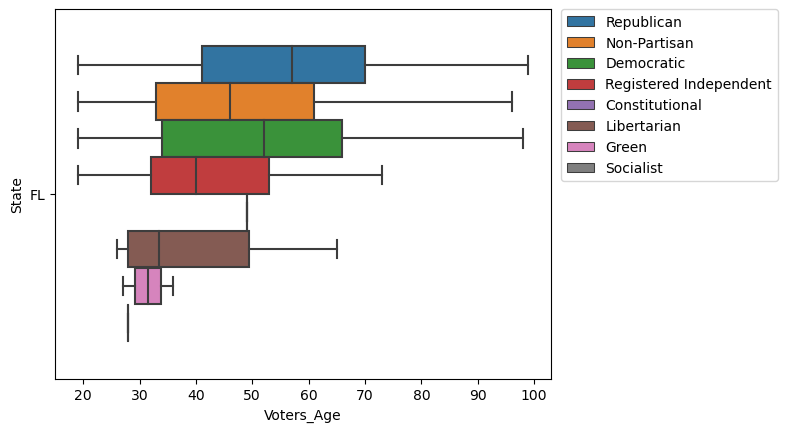

In [38]:
# age

ageplot_fl = sns.boxplot(data=df_fl_pd, x="Voters_Age", y="State",hue="Parties_Description")
ageplot_fl = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ageplot_fl

# The median Republican age is the greatest
# and for Green/Socialist its the lowest, but bear in mind we are looking at only 2000 obs

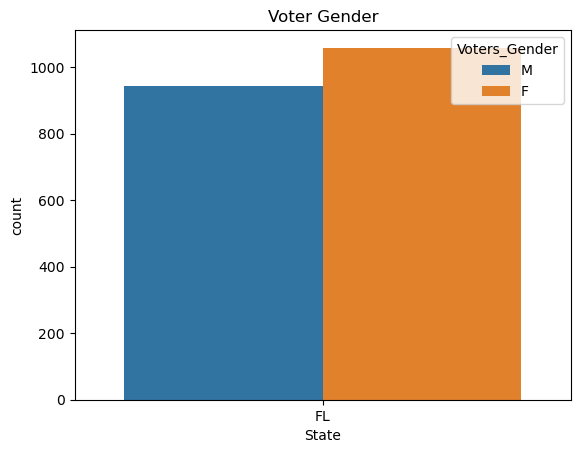

In [39]:
# gender
gender_chart_fl = sns.countplot(data=df_fl_pd, x="State",
                             hue="Voters_Gender").set(title="Voter Gender")

# there are more female voters in the sample

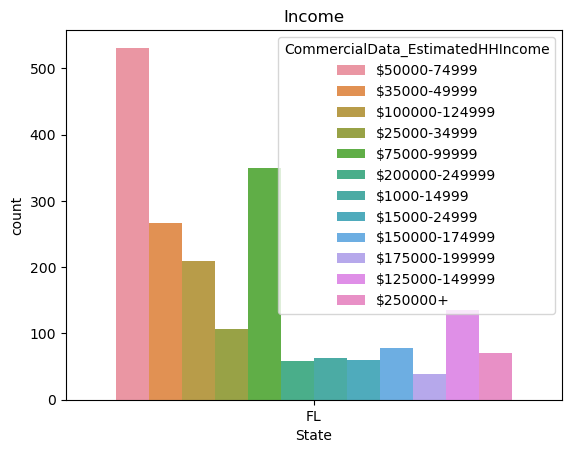

In [33]:
# income
income_chart_fl = sns.countplot(data=df_fl_pd, x="State",
                             hue="CommercialData_EstimatedHHIncome").set(title="Income")

# This income chart distribution is very interesting, the spread is a bit unexpected, (personally I expected more rich voters)
# but this is likely becuase there is a smaller population of wealthy voters 

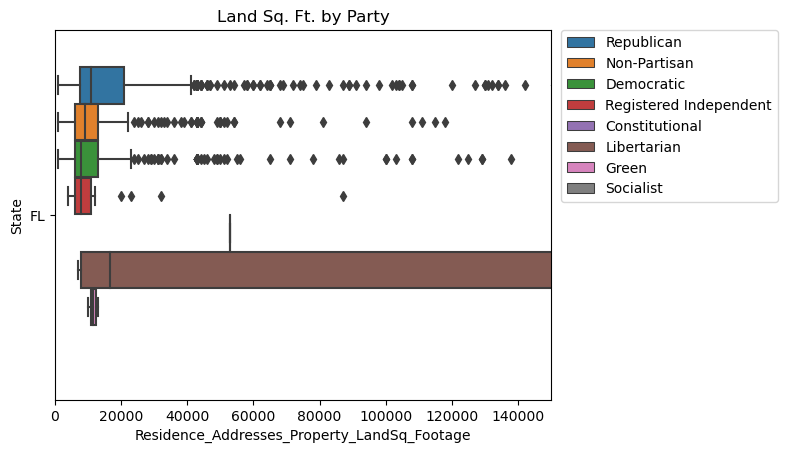

In [43]:
land_plot_fl = sns.boxplot(data=df_fl_pd, x="Residence_Addresses_Property_LandSq_Footage", y="State", hue="Parties_Description")
land_plot_fl.set(title="Land Sq. Ft. by Party")
land_plot_fl.set_xlim(0, 150000)
land_plot_fl = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

land_plot_fl

# this specific plot doesnt seem that right, likely due to small sample we are looking at
# but we can leave these plot here for now to generalize later, or maybe increase the sample size a little
# there could be a input errors in Libtertairan as well, or maybe they just live on huge land

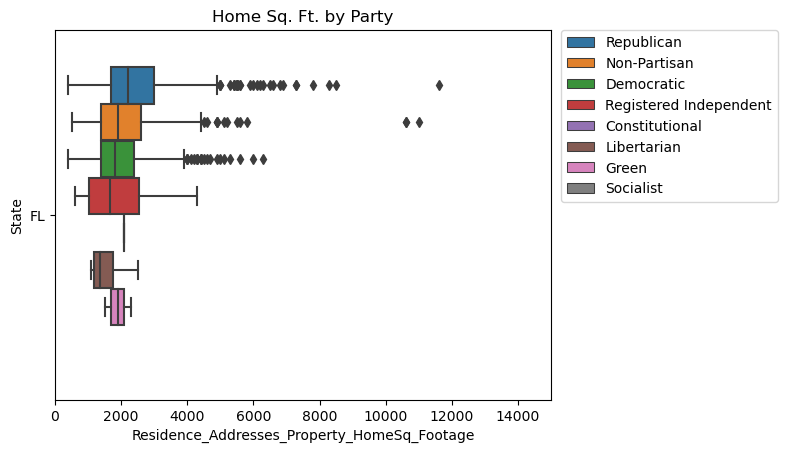

In [47]:
# consider the house sq ft itself
sqft_plot_fl = sns.boxplot(data=df_fl_pd, x="Residence_Addresses_Property_HomeSq_Footage", y="State", hue="Parties_Description")
sqft_plot_fl.set(title="Home Sq. Ft. by Party")
sqft_plot_fl.set_xlim(0, 15000)
sqft_plot_fl = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

sqft_plot_fl

# so to relate to the previous plot, likely they just have a huge piece of land bc we do not see the huge 
# box for libertarian again

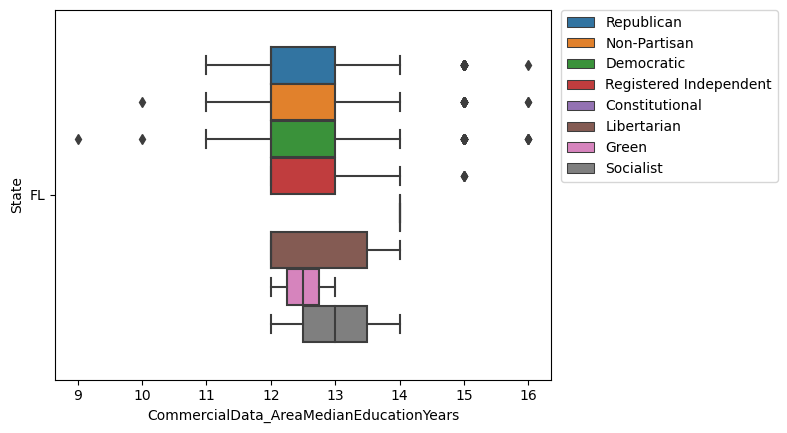

In [37]:
# education
eduplot_fl = sns.boxplot(data=df_fl_pd, x="CommercialData_AreaMedianEducationYears", y="State", hue="Parties_Description")
eduplot_fl = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
eduplot_fl
# there isnt much difference here in the median years of education, and is about expected
# the outliers here make sense too, that highly educated people would likely be aligned with the main parties
# or this may be due to a greater amt of people in the main parties regardless of education

## Party and Voter Turnout
Let's briefly look at party distribution and voter turn out for select elections in Florida.

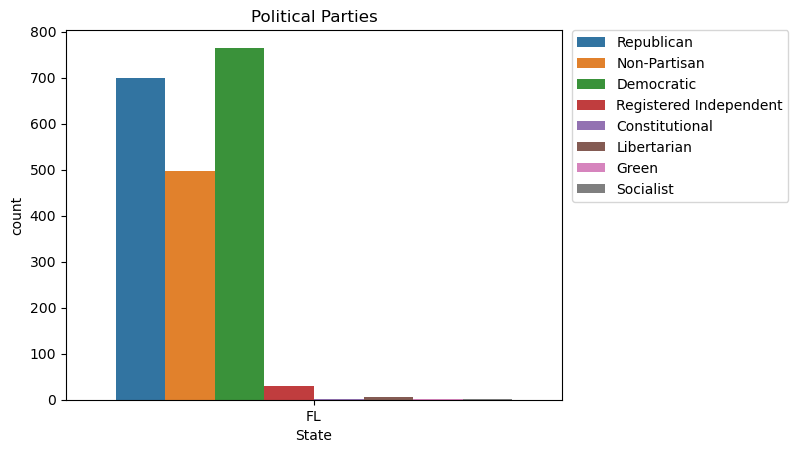

In [48]:
party_chart_fl = sns.countplot(data=df_fl_pd, x="State",
                             hue="Parties_Description").set(title="Political Parties")
party_chart_fl = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

party_chart_fl

In [65]:
turnout_2016_fl = df_fl_pd[["ElectionReturns_G16CountyTurnoutDemocrats", "ElectionReturns_G16CountyTurnoutRepublicans", "State"]]

turnout_2016_fl.loc[:, ["ElectionReturns_G16CountyTurnoutDemocrats","ElectionReturns_G16CountyTurnoutRepublicans"]] = (turnout_2016_fl
 .loc[:, ["ElectionReturns_G16CountyTurnoutDemocrats","ElectionReturns_G16CountyTurnoutRepublicans"]]
 .replace(r"%","", regex=True)
 .apply(pd.to_numeric, errors="coerce")
)

turnout_2016_fl = pd.melt(turnout_2016_fl, id_vars="State", value_vars=["ElectionReturns_G16CountyTurnoutDemocrats", "ElectionReturns_G16CountyTurnoutRepublicans"])
turnout_2016_fl.head()


/opt/conda/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,State,variable,value
0,FL,ElectionReturns_G16CountyTurnoutDemocrats,72
1,FL,ElectionReturns_G16CountyTurnoutDemocrats,74
2,FL,ElectionReturns_G16CountyTurnoutDemocrats,74
3,FL,ElectionReturns_G16CountyTurnoutDemocrats,69
4,FL,ElectionReturns_G16CountyTurnoutDemocrats,80


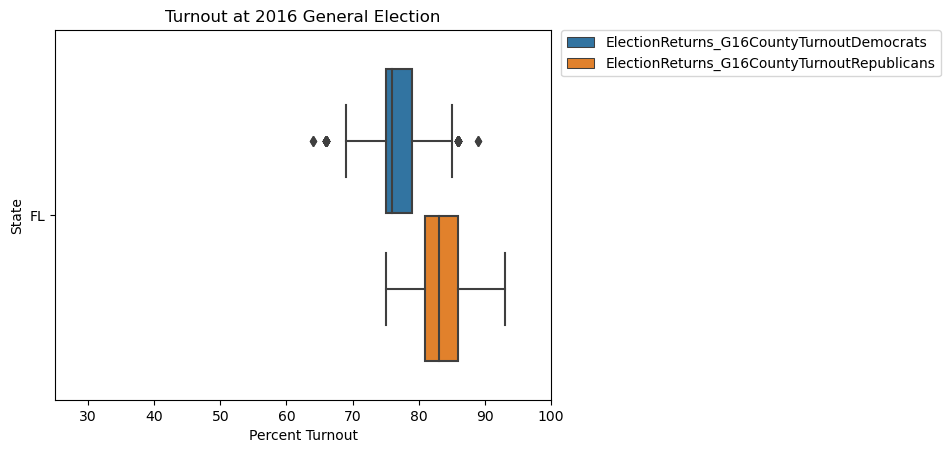

In [68]:
turnout_2016_plot_fl = sns.boxplot(data=turnout_2016_fl, x="value", y= "State", hue="variable")
turnout_2016_plot_fl.set(title="Turnout at 2016 General Election", xlabel="Percent Turnout")
turnout_2016_plot_fl.set_xlim(25,100)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)